In [1]:
from Coulomb import *
from plotting import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
matplotlib.__version__

'3.1.1'

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [3]:
help(Coulomb.beam_EM)

Help on function beam_EM in module Coulomb:

beam_EM(self, E, nparts, dt, tTot, snaps, strat=False, fixedWiener=False)
    E:      energy of beam particles [eV]
    nparts: number of particles [#]
    tTot:   total time of simulation [s]
    snaps:  number of snapshots to output; set to '1' for only the initial and final states
    strat:  Whether to include the Stratanovich correction
    fixedWiener: whether to use a fixed underlying Wiener process
    return: [tHist, vHist] History of velocities (timesteps * nparts * 3) and the corresponding times



In [4]:
t2, vHist2_EM = test.beam_EM(17000, 100, 1E-2, 0.5, 1000)

In [6]:
t2, vHist2_EM = test.beam_EM(17000, 100, 1E-2, 0.5, 1000)
speed2_EM = np.linalg.norm(vHist2_EM, axis = 2)
t4, vHist4_EM = test.beam_EM(17000, 100, 1E-4, 0.5, 1000)
speed4_EM = np.linalg.norm(vHist4_EM, axis = -1)

In [5]:
t2, vHist2 = test.beam_MEM(17000, 100, 1E-2, 0.5, 1000)
speed2 = np.linalg.norm(vHist2, axis = -1)
t4, vHist4 = test.beam_MEM(17000, 100, 1E-4, 0.5, 1000)
speed4 = np.linalg.norm(vHist4, axis = -1)

In [ ]:
help(formatAndSave)

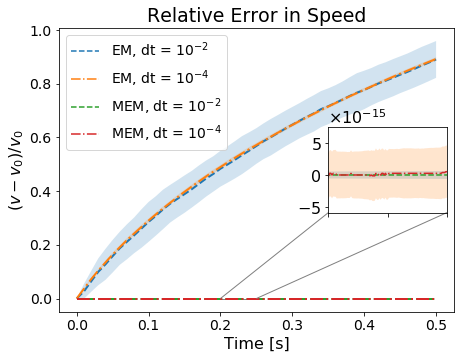

In [14]:
fig, ax = plt.subplots()
lines = []
lines = aveAndSTD(ax, speed2_EM, 0.5, markers = '--', label = 'EM, dt = $10^{-2}$')
lines += aveAndSTD(ax, speed4_EM, 0.5, markers = '-.', label = 'EM, dt = $10^{-4}$')
lines += aveAndSTD(ax, speed2, 0.5, markers = '--', label = 'MEM, dt = $10^{-2}$')
lines += aveAndSTD(ax, speed4, 0.5, markers = '-.', label = 'MEM, dt = $10^{-4}$')
# plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, 'Time [s]', '$(v - v_0) / v_0$', title = "Relative Error in Speed", fontsize = 16)
fig.set_size_inches(6.5, 5)
# ax.linewidth(2)

axins = inset_axes(ax, width='30%', height='30%', loc=7)
axins.set_xticklabels('')
axins.set_xlim(0.2, 0.25)
aveAndSTD(axins, speed2, 0.5, markers = 'C2--', label = 'MEM, dt = 1E-2')
aveAndSTD(axins, speed4, 0.5, markers = 'C3-.', label = 'MEM, dt = 1E-4')
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
axins.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
fig.savefig('compare_rel_inset.pdf')

No handles with labels found to put in legend.


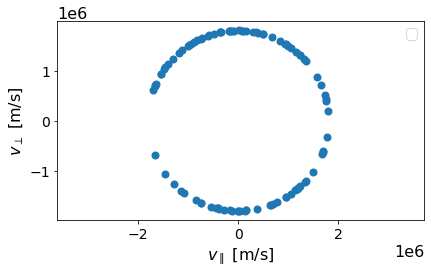

In [51]:
tslice = 1000
vx4 = vHist4[tslice, :, 0];
vy4 = vHist4[tslice, :, 1];
vz4 = vHist4[tslice, :, 2];
vperp4 = np.sqrt(vy4**2 + vz4**2) * np.sign(vz4);
# vexp4 = np.sqrt(vHist4[0, :, 0]**2 - vx4**2)
fig, ax = plt.subplots()
lines = ax.scatter(vx4, vperp4);
plt.axis('equal');
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', fontsize = 16, filename = 'Circle.pdf')

In [4]:
t3, vHist3 = test.beam_MEM(17000, 500, 1E-3, 0.5, 1000)
t3, vHist3_EM = test.beam_EM(17000, 500, 1E-3, 0.5, 1000)


[  0. 100. 200. 300. 400. 501.]


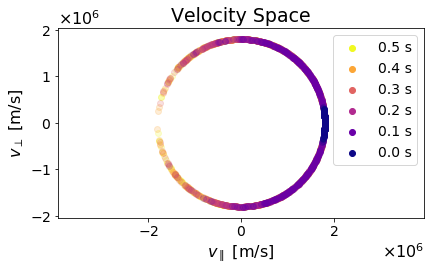

In [12]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
              title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps_MEM.pdf')

[  0. 100. 200. 300. 400. 501.]


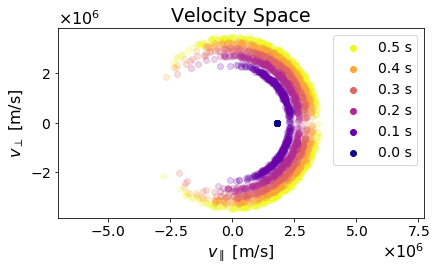

In [13]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3_EM, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
# vSpaceSnaps(ax, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
              title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps_EM.pdf')

In [152]:
t3[0]

0.0

[  0. 100. 200. 300. 400. 501.]
[  0. 100. 200. 300. 400. 501.]


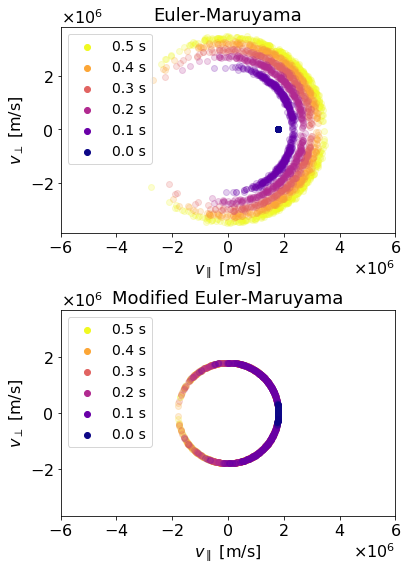

In [45]:
fig= plt.figure()
ax0 = fig.add_subplot(211)

# ax0.set_ylim(-4, 4)
# plt.axis('equal')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0), useMathText=True)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0), useMathText=True)
ax1 = fig.add_subplot(212, sharex = ax0)

plt.axis('equal')
# plt.suptitle('Velocity space distribution')
updateGlobal(16)
fig.set_size_inches(6, 9)
ax1.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0), useMathText=True)

vSpaceSnaps(ax0, vHist3_EM, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
ax0.set_title('Euler-Maruyama')
vSpaceSnaps(ax1, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
ax1.set_title('Modified Euler-Maruyama')

plt.subplots_adjust(hspace = 0.375)

ax0.set_xlim(-6e6, 6e6)
ax0.set_xlabel('$v_{\parallel}$ [m/s]')
ax0.set_ylabel('$v_{\perp}$ [m/s]')
# ax0.set_xticklabels('')

ax1.set_xlim(-6e6, 6e6)
ax1.set_xlabel('$v_{\parallel}$ [m/s]')
ax1.set_ylabel('$v_{\perp}$ [m/s]')

leg0 = ax0.legend(loc = 2)
leg = ax1.legend(loc = 2)
for lh in leg.legendHandles + leg0.legendHandles:
    lh.set_alpha(1)
fig.savefig('circle_comp.pdf')

In [4]:
help(test.beam_MEM)

Help on method beam_MEM in module Coulomb:

beam_MEM(E, nparts, dt, tTot, snaps, correctors=1, fixedWiener=False) method of Coulomb.Coulomb instance
    E:      energy of beam particles [eV]
    nparts: number of particles [#]
    tTot:   total time of simulation [s]
    return: History of velocities (timesteps * nparts * 3)



In [6]:
t, vHist = test.beam_MEM(17000, 1000, 1E-5, 0.1, 100)
vHist.shape

(101, 1000, 3)

In [63]:
vDiff = np.diff(vHist, n =2,  axis = 0)
time = np.linspace(0, 0.2, vDiff.shape[0])
print(vDiff.shape)
# fig = plt.plot(time, vDiff[:,:,1])

(999, 1000, 3)


In [64]:
vVar = np.var(vDiff, axis = 1)
print(vVar.shape)

(999, 3)


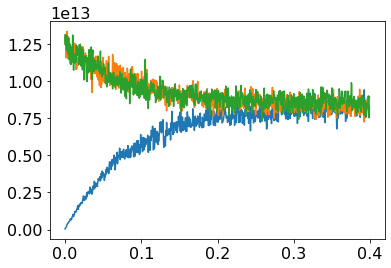

In [65]:
dt = t[2] - t[0]
fig = plt.plot(t[:-2], vVar/dt)

In [66]:
vHist5 = vHist

In [67]:
t, vHist5EM = test.beam_EM(17000, 1000, 1E-5, 0.4, 1000)
vHistEM.shape

(1001, 1000, 3)

In [68]:
vDiffEM = np.diff(vHistEM, n =2,  axis = 0)
timeEM = np.linspace(0, 0.2, vDiffEM.shape[0])
print(vDiffEM.shape)
# fig = plt.plot(time, vDiff[:,:,1])

(999, 1000, 3)


In [69]:
vVarEM = np.var(vDiffEM, axis = 1)
print(vVarEM.shape)

(999, 3)


In [70]:
v0 = vHist[0, 0]
print(v0)
nuperp = test.nu_perp(v0)
Dperp = v0[0]**2 * 0.5 * nuperp
print(Dperp/2)

[1804661.54463653       0.               0.        ]
6255676862869.169


No handles with labels found to put in legend.


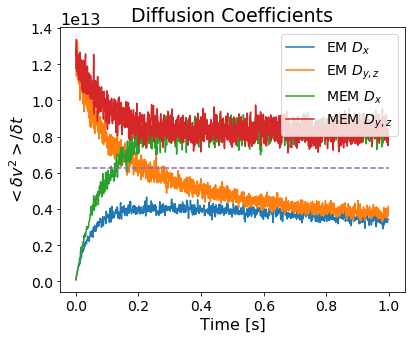

In [50]:
fig, ax = plt.subplots()
line = []
dt = t[1] - t[0]
for out, c in zip(vVarEM.T/(2*dt), ['C0', 'C1', 'C1']):
    line += plt.plot(t[:-2], out, c)
    
for out, c in zip(vVar.T/(2*dt), ['C2', 'C3', 'C3']):
    line += plt.plot(t[:-2], out, c)
    
plt.plot([0, 1], [Dperp/2, Dperp/2], 'C4--')

formatAndSave(fig, ax, lines, 'Time [s]', '$<\delta v^2>/\delta t$', 
              title = 'Diffusion Coefficients', fontsize = 16,
             )
fig.set_size_inches(6, 5)
# ax.set_ylim(0, 13e13)
plt.legend([line[0], line[1], line[3], line[4]], 
           ['EM $D_{x}$', 'EM $D_{y,z}$', 'MEM $D_{x}$', 'MEM $D_{y,z}$'],
          loc = 1)
plt.tight_layout()
fig.savefig('D_perp_comparison_4.pdf')

No handles with labels found to put in legend.


0.0008000000000000014


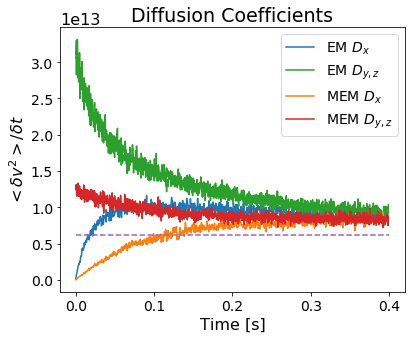

In [78]:
fig, ax = plt.subplots()
line = []
dt = t[2] - t[0]
print(dt)
for out, c in zip(vVarEM.T/(dt), ['C0', 'C2', 'C2']):
    line += plt.plot(t[:-2], out, c)
    
for out, c in zip(vVar.T/(dt), ['C1', 'C3', 'C3']):
    line += plt.plot(t[:-2], out, c)
    
plt.plot([0, t[-1]], [Dperp/2, Dperp/2], 'C4--')

formatAndSave(fig, ax, lines, 'Time [s]', '$<\delta v^2>/\delta t$', 
              title = 'Diffusion Coefficients', fontsize = 16,
             )
fig.set_size_inches(6, 5)
# ax.set_ylim(0, 13e13)
plt.legend([line[0], line[1], line[3], line[4]], 
           ['EM $D_{x}$', 'EM $D_{y,z}$', 'MEM $D_{x}$', 'MEM $D_{y,z}$'],
          loc = 1)
plt.tight_layout()
fig.savefig('D_perp_comparison_5.pdf')

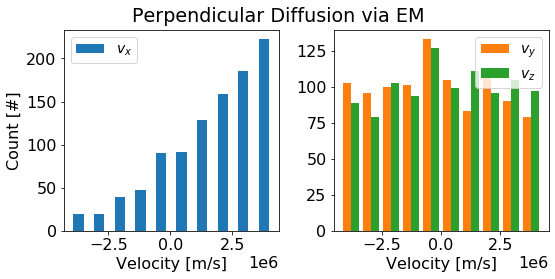

In [79]:
first = vHistEM[0, :, 1:]
last = vHistEM[-1, :, 1:]

fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122)
plt.suptitle('Perpendicular Diffusion via EM')
updateGlobal(16)

fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHistEM[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
# ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.9)

fig.savefig('dist_perp_EM.pdf',bbox_inches = 'tight')

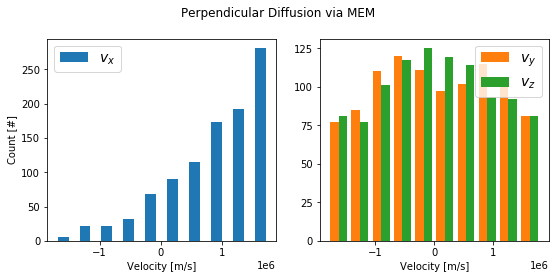

In [7]:
first = vHist[0, :, 1:]
last = vHist[-1, :, 1:]

fig= plt.figure()
ax0 = fig.add_subplot(121)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))
ax1 = fig.add_subplot(122)
plt.suptitle('Perpendicular Diffusion via MEM')
updateGlobal(16)

fig.set_size_inches(8, 4)
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0))

ax0.hist(vHist[-1, :, 0], color = 'C0', rwidth = 0.5)
ax0.legend(['$v_x$'])
ax0.set_ylabel('Count [#]')
ax0.set_xlabel('Velocity [m/s]')

ax1.hist(last, label = ['vy', 'vz'], color = ['C1', 'C2'])
ax1.set_xlabel('Velocity [m/s]')
ax1.legend(['$v_y$', '$v_z$'])
# ax1.axes.yaxis.set_ticklabels([])
plt.tight_layout()
plt.subplots_adjust(top = 0.87)

# fig.savefig('dist_perp_MEM.pdf',bbox_inches = 'tight')

In [5]:
v0 = vHist2_EM[0, 0]
nuperp = test.nu_perp(v0)
print('collision time is: ', 1/nuperp, 'seconds')
Dperp = v0[0]**2 * 0.5 * nuperp
print(Dperp)

collision time is:  0.13015391308096474 seconds
12511353725738.338


In [32]:
moments = [1, 2, 3, 4]
iList, momList = test.pitchIter(17000, 100, 1E-3, 10, 2000, 100, 10, moments, 'MEM', False, True)

In [6]:
var_exp = (2./3.) * 17000 * QE / test.mb
print(var_exp)

1085601096896.6348


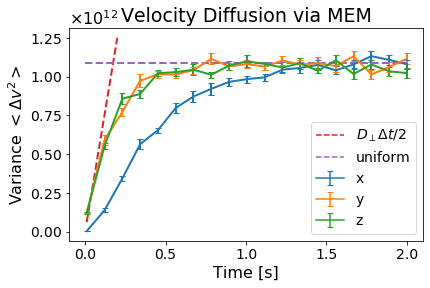

In [108]:
aveMom = np.mean(momList, axis = 1)
steMom = stats.sem(momList, axis = 1)
momIndex = 1
lines = []
fig, ax = plt.subplots()
tList = iList * 1e-3
for index, lab in zip ([0, 1, 2], ['x', 'y', 'z']):
    ebar = ax.errorbar(tList, aveMom[:, momIndex, index], steMom[:, momIndex, index], capsize = 3, label = lab)
    lines += ebar.lines

ends = np.array([tList[0], 0.2])
expect = Dperp * ends/2

lines += plt.plot(ends, expect, '--', label = '$D_\perp \Delta t/ 2$')
lines += plt.plot([0, tList[-1]], [var_exp, var_exp], '--', label = 'uniform')

# plt.subplots_adjust(left = 0.1)
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0), useMathText=True)
formatAndSave(fig, ax, lines, 'Time [s]', 'Variance $<\Delta v^2>$', title = 'Velocity Diffusion via MEM',
             fontsize = 16,
             filename = 'diff_MEM.pdf'
             )
fig.savefig('diff_MEM.pdf', bbox_inches = "tight")
# ax.set_xlim(0, 500)
# plt.xscale('log')
# plt.yscale('log')

In [7]:
moments = [1, 2, 3, 4]
iList, momListEM = test.pitchIter(17000, 100, 1E-3, 10, 2000, 100, 10, moments, 'EM', False, True)

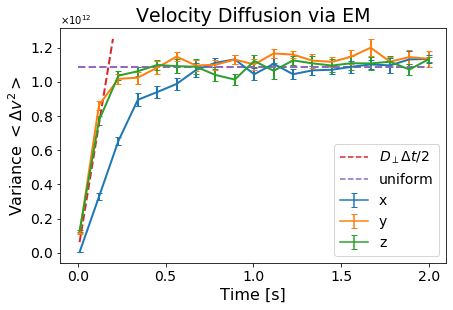

In [8]:
aveMomEM = np.mean(momListEM, axis = 1)
steMomEM = stats.sem(momListEM, axis = 1)
momIndex = 1
lines = []
fig, ax = plt.subplots()
tList = iList * 1e-3
for index, lab in zip ([0, 1, 2], ['x', 'y', 'z']):
    ebar = ax.errorbar(tList, aveMomEM[:, momIndex, index], steMomEM[:, momIndex, index], capsize = 3, label = lab)
    lines += ebar.lines

ends = np.array([tList[0], 0.2])
expect = Dperp * ends/2

lines += plt.plot(ends, expect, '--', label = '$D_\perp \Delta t/ 2$')
lines += plt.plot([0, tList[-1]], [var_exp, var_exp], '--', label = 'uniform')
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0), useMathText=True)
# plt.tight_layout()
formatAndSave(fig, ax, lines, 'Time [s]', 'Variance $<\Delta v^2>$', title = 'Velocity Diffusion via EM',
             fontsize = 16,
             filename = 'diff_EM_strat.pdf'
             )
fig.savefig('diff_EM_strat.pdf', bbox_inches = "tight")
# plt.xscale('log')
# plt.yscale('log')

In [3]:
moments = [1, 2, 3, 4]
dtList, momList = test.pitchConvergence(17000, 500, -4, -1, 0.2, 10, moments, 'MEM', False, True)

KeyboardInterrupt: 

(15,) (15, 10, 4, 3)
(15, 4, 3)


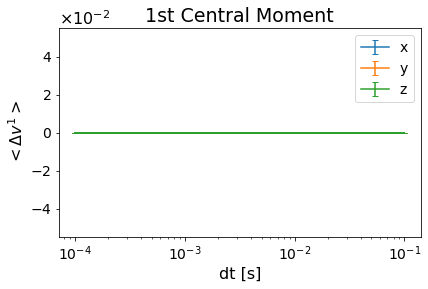

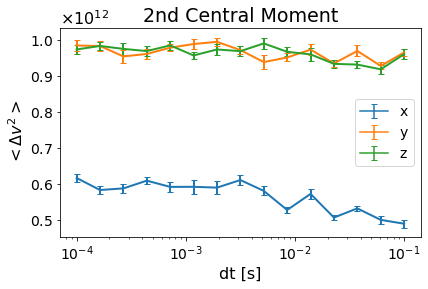

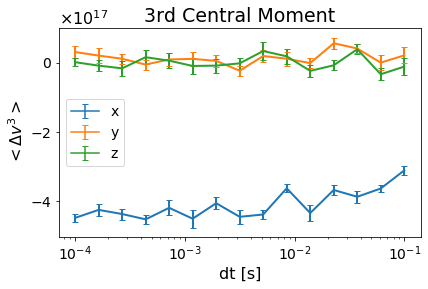

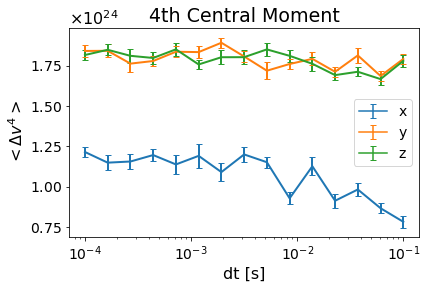

In [31]:
print(dtList.shape, momList.shape)
aveMom = np.mean(momList, axis = 1)
steMom = stats.sem(momList, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([0, 1, 2], ['x', 'y', 'z']):
        ebar = ax.errorbar(dtList, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
    # plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    formatAndSave(fig, ax, lines, 'dt [s]', '$<\Delta v^{}>$'.format(power), fontsize = 16,
                  title = name +' Central Moment',
                 filename = name +'Moment.pdf')

In [4]:
moments = [1, 2, 3, 4]
dtList, momListEM = test.pitchConvergence(17000, 500, -4, -1, 0.2, 10, moments, 'EM', False, True)

Text(0.5, 0, 'dt')

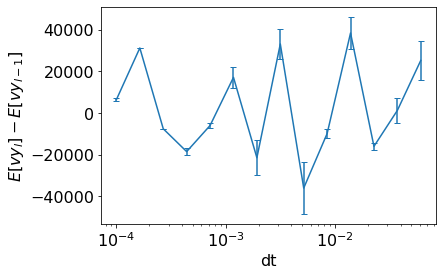

In [15]:
# aveMom = np.mean(momListEM, axis = 1)
# steMom = stats.sem(momListEM, axis = 1)

aveMom = np.diff(np.mean(momListEM, axis = 1), axis =0)
steMom = np.diff(stats.sem(momListEM, axis = 1), axis = 0)

fig, ax = plt.subplots()
momIndex = 0
i = 1
ebar = ax.errorbar(dtList[1:], aveMom[:, momIndex, i], steMom[:, momIndex, i], 
                   capsize = 3, label = lab)
plt.xscale('log')
plt.ylabel('$E[vy_l] - E[vy_{l-1}]$')
plt.xlabel('dt')

(15,) (15, 10, 4, 3)
(15, 4, 3)


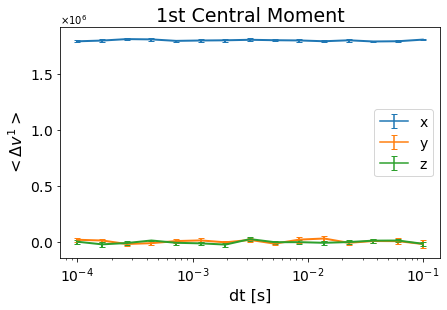

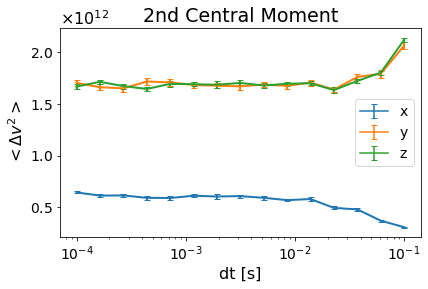

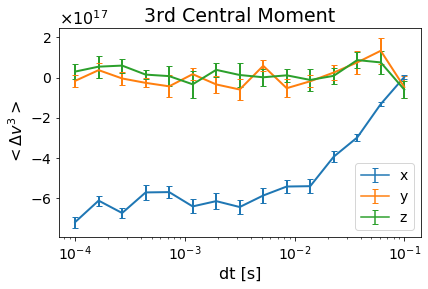

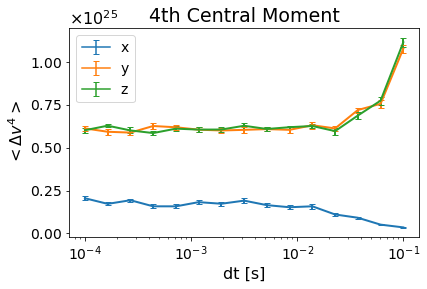

In [5]:
print(dtList.shape, momListEM.shape)
aveMom = np.mean(momListEM, axis = 1)
steMom = stats.sem(momListEM, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([0, 1, 2], ['x', 'y', 'z']):
        ebar = ax.errorbar(dtList, aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    formatAndSave(fig, ax, lines, 'dt [s]', '$<\Delta v^{}>$'.format(power), fontsize = 16,
                  title = name +' Central Moment',
#                  filename = name +'MomentEM.pdf',
                 )

In [16]:
moments = [1, 2, 3, 4]
dtList, momSpeedMEM = test.energyConvergence(17000, 500, -4, -1, 0.2, 10, moments, 'MEM', False, True)

No handles with labels found to put in legend.


(15,) (15, 10, 4, 1)
(15, 4, 1)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


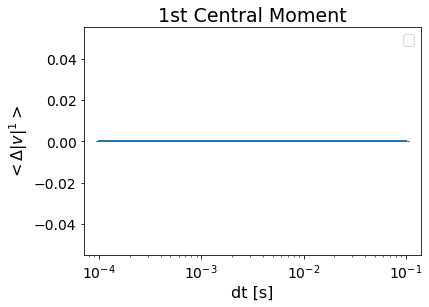

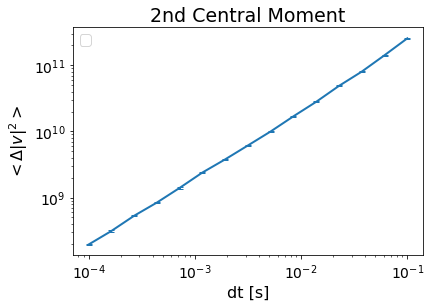

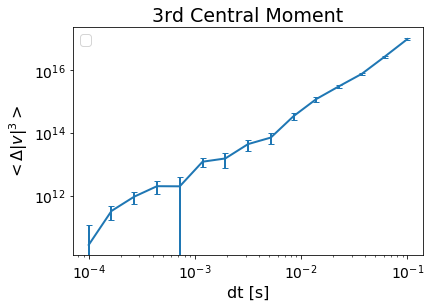

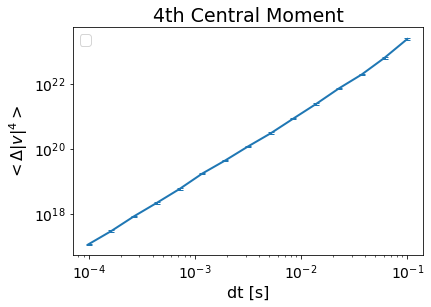

In [29]:
print(dtList.shape, momSpeedMEM.shape)
aveMom = np.mean(momSpeedMEM, axis = 1)
steMom = stats.sem(momSpeedMEM, axis = 1)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    
    ebar = ax.errorbar(dtList, aveMom[:, momIndex, 0], steMom[:, momIndex, 0], capsize = 3)
    lines += ebar.lines
    plt.xscale('log')
    
    if momIndex != 0:
        plt.yscale('log')
#     plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    formatAndSave(fig, ax, lines, 'dt [s]', '$<\Delta |v|^{}>$'.format(power), fontsize = 16,
                  title = name +' Central Moment',
                 filename = name +'SpeedMomentMEM.pdf')

(15,) (15, 10, 4, 3)
(14, 4, 3)


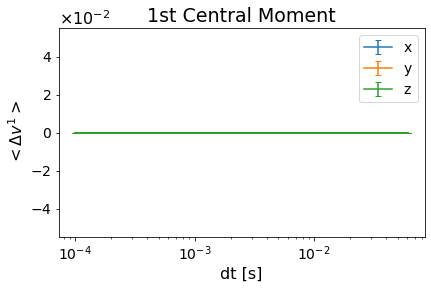

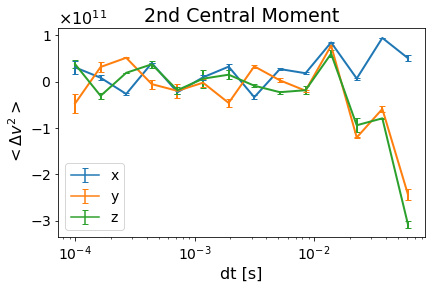

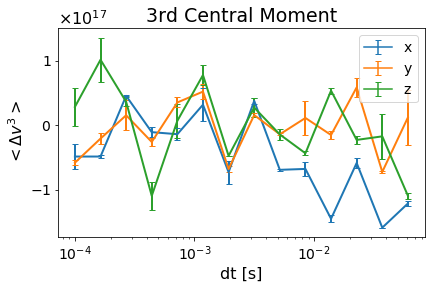

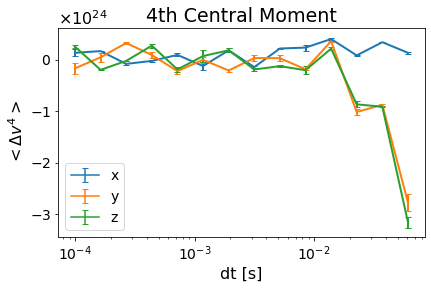

In [140]:
print(dtList.shape, momListEM.shape)
aveMom = np.diff(np.mean(momListEM, axis = 1), axis = 0)
steMom = np.diff(stats.sem(momListEM, axis = 1), axis = 0)
print(aveMom.shape)
# print(dtList, aveMom)
# plt.plot(dtList, aveMom[:, 2, 0])


for momIndex, name in zip(moments, ['1st', '2nd', '3rd', '4th']):
    fig, ax = plt.subplots()
    lines = []
    momIndex = momIndex -1
    for i, lab in zip([0, 1, 2], ['x', 'y', 'z']):
        ebar = ax.errorbar(dtList[1:], aveMom[:, momIndex, i], steMom[:, momIndex, i], capsize = 3, label = lab)
        lines += ebar.lines
    plt.xscale('log')
#     plt.yscale('log')
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
    power =  str(moments[momIndex])
    formatAndSave(fig, ax, lines, 'dt [s]', '$<\Delta v^{}>$'.format(power), fontsize = 16,
                  title = name +' Central Moment',
#                  filename = name +'MomentEM.pdf',
                 )

In [7]:
help(test.beam_EM)

Help on method beam_EM in module Coulomb:

beam_EM(E, nparts, dt, tTot, snaps, strat=False, fixedWiener=False) method of Coulomb.Coulomb instance
    E:      energy of beam particles [eV]
    nparts: number of particles [#]
    tTot:   total time of simulation [s]
    snaps:  number of snapshots to output; set to '1' for only the initial and final states
    strat:  Whether to include the Stratanovich correction
    fixedWiener: whether to use a fixed underlying Wiener process
    return: [tHist, vHist] History of velocities (timesteps * nparts * 3) and the corresponding times



In [3]:
t2, beam_fixed_2 = test.beam_EM(17000, 1, 0.01, 0.1, 10, True, True)
t3, beam_fixed_3 = test.beam_EM(17000, 1, 0.005, 0.1, 100, True, True)

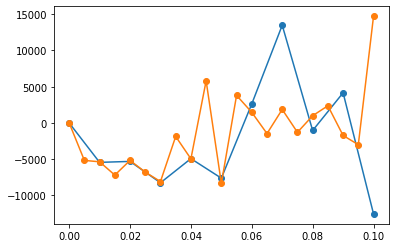

In [7]:
plt.plot(t2, beam_fixed_2[:, 0, 1], 'o-')
plt.plot(t3, beam_fixed_3[:, 0, 1], 'o-')

[  0. 100. 200. 300. 400. 501.]


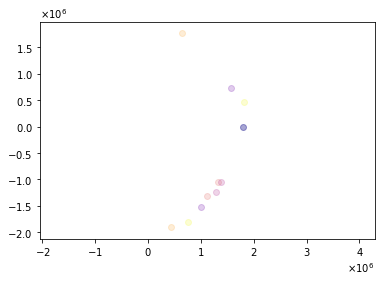

In [99]:
t3, vHist3_strat = test.beam_EM(17000, 2, 1E-3, 0.5, 1000, strat = True)
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)


In [138]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)
num = 6
tTot = 0.09


In [139]:
vcomp = 1

0.09
0.045
0.0225
0.01125
0.005625
0.0028125


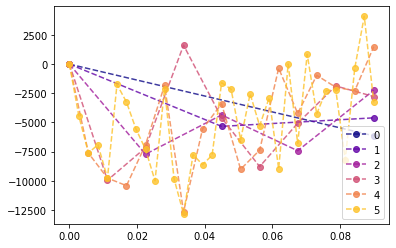

In [140]:
fig, ax = plt.subplots()
# timesteps = 2**np.array(range(num))
timesteps = np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.15)
colors = pylab.cm.plasma(timesteps)


for l in range(num):
    dt = tTot / (2**l)
    print(dt)
    time, hist = test.beam_EM(17000, 10, dt, tTot, 10**(num+1), 
                              True, True)
    ax.plot(time, hist[:, 0, vcomp], 'o--', 
            alpha = 0.8, color = colors[l], label = l)
plt.legend()

[ 0.  6. 13. 20. 26. 32.]


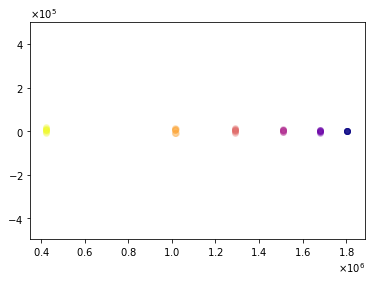

In [141]:
fig, ax = plt.subplots()

# vx = hist[:, :, 0]
# vy = hist[:, :, 1]
# vz = hist[:, :, 2]
# vperp = np.sqrt(vy**2 + vz**2) * np.sign(vz)
# lines = ax.scatter(vx, vy, alpha = 0.2, )
# plt.axis('equal')

vSpaceSnaps(ax, hist, np.array([0, 0.02, 0.04, 0.06, 0.08, 0.098]), 0.0985)

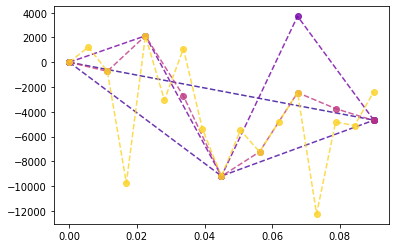

In [107]:
fig, ax = plt.subplots()
timesteps = 2**np.array(range(num))
timesteps = timesteps / (np.max(timesteps)*1.1)
colors = pylab.cm.plasma(timesteps)


for l in range(num):
#     time, hist = test.beam_EM(17000, 1, tTot / (2**l), tTot, 10**(num+1), 
#                               True, True)
#     ax.plot(time, hist[:, 0, vcomp], '+--', 
#             alpha = 0.8, color = colors[l], label = l)
    
    time, hist = test.beam_MEM(17000, 10, tTot / (2**l), tTot, 10**(num+1), 
                              True)
    ax.plot(time, -hist[:, 0, vcomp], 'o--', 
            alpha = 0.8, color = colors[l],label = l)
# plt.legend()

[ 0.  1.  3.  5.  7. 13. 15.]


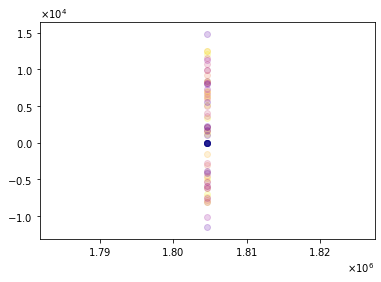

In [108]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, hist, np.array([0, 0.01, 0.02, 0.03, 0.04, 0.07, 0.08]), 0.09)

In [47]:
time, hist = test.beam_EM(17000, 4, 0.01, 0.2, 10**(num+1), 
                              True, True)

In [67]:
test.wienerProcess(0.01, 4, True, 0.1)

array([[ 0.00207139, -0.00238507,  0.00078865],
       [ 0.0004796 ,  0.00385366, -0.00094143],
       [ 0.00014043,  0.00149396,  0.00237463],
       [ 0.00132614,  0.00036745, -0.0032865 ]])

In [68]:
test.wienerProcess(0.01, 4, False, 0.1)

array([[ 0.19950871, -0.13612144, -0.03336187],
       [ 0.0080787 ,  0.01193507,  0.04434048],
       [ 0.06906245,  0.13320109, -0.11990538],
       [-0.09368137, -0.04234191, -0.03646721]])

In [57]:
test.wiener[:5, :, :]
np.var(test.wiener[:, 0, 0])

2.0028374888635443e-06

In [70]:
def rolling_sum(a, n = 10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1: ]

In [80]:
# dW = test.wiener[10000:, :, :] + test.wiener[:-10000, :, :]
dW = rolling_sum(test.wiener[:, 0, 0], 10000)
print(np.var(dW))
# print(np.var(dW[:, 0, 0]))
print(dW.shape)
# print(dW[:5, :, :])
print(dW[:5])
# plt.hist(dW[:, 1, 1], 20)

0.013104749058186762
(189999,)
[0.2204721  0.22263004 0.22112405 0.22172711 0.22309726]
